In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), ( x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

ModuleNotFoundError: No module named 'tensorflow'

(x_train, y_train), (x_test, y_test) = mnist.load_data(): 훈련 데이터 6만개과 테스트 데이터셋
1만개를 각각 (x_train, y_train)과 (x_test, y_test) 변수에 저장.
x_train/255.0과 x_test/255.0: x_train과 x_test를 0과 1 사이의 값으로 정규화.

In [7]:
model = Sequential([Flatten(input_shape=(28,28)),
                    Dense(123, activation='relu'),
                    Dense(10,activation='softmax')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 10, batch_size =32, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8766 - loss: 0.4409 - val_accuracy: 0.9593 - val_loss: 0.1386
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9621 - loss: 0.1289 - val_accuracy: 0.9720 - val_loss: 0.0903
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9752 - loss: 0.0807 - val_accuracy: 0.9741 - val_loss: 0.0850
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9824 - loss: 0.0578 - val_accuracy: 0.9765 - val_loss: 0.0770
Epoch 5/10
1125/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0463

KeyboardInterrupt: 

Flatten(input_shape=(28,28)입력 데이터를 2차원에서 1차원으로 평탄화(flatten)
입력 데이터의 크기가 (28, 28)이므로, 이를 1차원인 (784,) 형태로 변환.
Dense(128,activation='relu):fully connected(완전 연결) 레이어로, 128개의 뉴런
레이어는 입력과 출력이 완전히 연결되어 있고, ReLU 함수를 통과한 결과를 출력.
Dense(10,activation='softmax):마지막으로 출력 레이어, 10개의 뉴런
10개의 클래스에 대한 확률 분포를 출력

In [4]:
x_train = x_train.reshape(-1,784)/255.0
x_test = x_test.reshape(-1,784)/255.0
model = Sequential([Dense(128,activation='relu', input_dim=784),
                    Dense(10,activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


•x_test.reshape(-1, 784)
•2차원 형태: (N, 784)
•차원별 특성의 이름:
첫 번째 차원: 샘플 개수 (N)
•두 번째 차원: 특성 개수
(784)

In [5]:
atest_loss, atest_accuracy = model.evaluate(x_test,y_test)
print('ANN Test loss', atest_loss)
print('ANN Test Accuracy:',atest_accuracy)

ValueError: You must call `compile()` before using the model.

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)/255.0
x_test = x_test.reshape(-1,28,28,1)/255.0


x_train.reshape(-1,28,28,1)훈련 데이터셋인 x_train을 4차원 배열로 변환
reshape 함수를 사용하여 배열의 형태를 (샘플 개수, 높이, 너비, 채널)로 변경.
-1은 남은 차원을 자동으로 계산. 28, 28, 1은 각각 이미지의 높이, 너비, 채널.
입력 이미지는 흑백 이미지이므로 채널은 1.
이미지의 공간적인 정보를 보존하기 위한 구조 => 4차원 형태로 변환하여 입력
•첫 번째 차원: 샘플의 개수 (이미지의 수)
 한 번에 모델에 입력되는 이미지의 수,
 학습과 테스트 과정에서 데이터를 미니배치
•두 번째 차원: 이미지의 높이
•세 번째 차원: 이미지의 너비
•네 번째 차원: 이미지의 채널 수 (흑백 이미지의 경우 1, 컬러 이미지의 경우 3)
x_train = x_train.reshape(-1,28,28,1)/255.0:0과 1 사이의 값으로 정규화.
x_test = x_test.reshape(-1,28,28,1)/255.0: x_test도 4차원 배열로 변환하고 정규화.

In [10]:
model = Sequential([Conv2D(64,(4,4), activation='relu', input_shape = (28,28,1)),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(10,activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10


Exception ignored in: <function _xla_gc_callback at 0x7868f89537e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


  35/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 26ms/step - accuracy: 0.4487 - loss: 1.6425

KeyboardInterrupt: 

손실값과 정확도가 낮아지는 경우의 상황(?)
1.모델의 아키텍처나 하이퍼파라미터 설정의 문제:
네트워크의 깊이, 뉴런의 수, 학습률 등
2.과적합(overfitting):
모델이 훈련 데이터에 과도하게 맞춰져서 테스트 데이터에 대한 일반화 능력이
떨어질 수 있다.
3.더 복잡한 모델 필요:
더 깊거나 복잡한 모델 구조를 사용하여 성능을 향상시킬 수 있습니다

주요 차이점은 CNN 방식에서 Conv2D과 MaxPooling2D을 사용.
cnn은 이미지와 같은 공간 정보를 효과적으로 처리
.
ANN 방식은 2D 이미지 데이터를 단순히 1d 백터로 평탄화하고, 후속 연산에는 완전 연결(Dense)층
을 사용합니다.
cnn은 이미지의 공간정보 (4d배열)를 처리하는 데 특화 되어 있다
ann은 일반저긍니 분류작업에 더많이 사용
ann의 단점으로
•이미지와 같은 2D 데이터의 공간 정보를 잘 활용하지 못할 수 있다.
•많은 은닉층을 가질 경우, 과적함(overfitting)문제가 발생.
cnn의 단점
•ANN보다 구조가 복잡하고 계산량이 많아
•대규모 이미지 데이터셋 학습을 위해선 많은 컴퓨팅 자원이 필요할 수 있다.

구분 ANN CNN
데이터 구조 입력 데이터를 1차원 벡터로 펼침 입력 데이터의 공간 구조를 유지
주요 특징 공간 정보 손실 공간 정보 보존
예시 이미지 픽셀을 일렬로 펼침 이미지의 지역적 패턴을 인식
사용 사례 텍스트 분류, 숫자 인식 등 이미지 분류, 객체 감지 등

ANN (Artificial Neural Network) CNN (Convolutional Neural Network)
데이터 전처리 입력 데이터를 1차원 벡터로 펼침 입력 데이터의 공간 구조를 유지
모델 구성 model = Sequential() model = Sequential()
model.add(Dense(units=64, activation='relu', input_s
hape=(784,)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'
, input_shape=(28, 28, 1)))
model.add(Dense(units=10, activation='softmax'))
model.add(MaxPooling2D(pool_size=(2, 2)))
Flatten(),
 Dense(64, activation='relu'),
 Dense(10, activation='softmax')
학습 과정 model.compile(optimizer='adam', loss='categorical_c
rossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crosse
ntropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32) model.fit(X_train, y_train, epochs=10, batch_size=32)

표준화 데이터의 평균을 0으로, 표준편차를 1로 만들어 데이터의 분포를 조정하는 작업.
표준화는 데이터를 정규분포로 변환하여 평균과 표준편차를 기준으로 데이터를 조정. 이를
통해 데이터의 범위가 표준화되어 각 특성이 동일한 중요도를 가지게 된다.
평균 0을 기준으로 좌우(-,+)로 위치하는 숫자 표시
2)정규화
데이터의 범위를 0과 1 사이로 조정하여 데이터를 비율적으로 일치시키는 작업.
정규화는 데이터를 최소값과 최대값으로 나누어서 데이터를 0과 1 사이의 범위로 조정.
데이터의 상대적인 비율을 유지하면서 스케일을 조정.
최대값으로 나누었으므로 0 ~ 1 사이 값
3) 원핫인코딩
범주형 데이터를 숫자로 변환하는 과정 범주에 대해 해당하는 위치는 1로 표시하고, 나머지
위치는 0으로 표시. 이를 통해 범주형 데이터를 다룰 수 있게 된다.

아래는 이미지에서 추출한 텍스트를 정리하고 해설을 덧붙인 내용입니다. CNN에서 `Conv2D` 레이어를 사용할 때 `input_shape`, `kernel_size`, `filters` 등의 파라미터 사용 방식이 잘 설명되어 있습니다.

---

## 🔹 Conv2D 레이어 사용 예시 및 설명

### ✅ 단일 채널 흑백 이미지 입력

```python
Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))
```

* 입력 이미지 크기: 28x28
* 채널 수: 1 (흑백 이미지)

---

### ✅ RGB 이미지 입력 (컬러 이미지)

```python
Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3))
```

* 입력 이미지 크기: 32x32
* 채널 수: 3 (RGB)
* 필터 개수: 64개
* 커널 사이즈: 5x5

---

### ✅ 입력 크기 유동적인 경우

```python
Conv2D(16, (3, 3), activation='relu', input_shape=(None, None, 1))
```

* 입력 크기: 가변 (예: 다양한 해상도의 단일 채널 이미지)
* 채널 수: 1 (흑백 이미지)

---

### ✅ 다른 표기 방식 예시

```python
Conv2D(activation='relu', input_shape=(32, 32, 3), filters=64, kernel_size=(3, 3))
```

* 인자 순서를 바꾼 표현 방식
* `filters`와 `kernel_size`를 명시적으로 작성 (순서와 무관)

> ✅ **중요**:
> Conv2D의 인자 순서는 변경해도 무방하지만, **가독성**을 고려해 일관되게 작성하는 것이 좋습니다.

---

## 🔸 요약 포인트

* `input_shape=(height, width, channels)` 로 정의
* `kernel_size=(3, 3)` 은 3x3 필터를 의미
* `filters=64` → 64개의 특징 맵(feature map)을 생성
* 이미지의 색상 채널 수에 따라 입력 차원이 달라짐:

  * 흑백: 1
  * RGB: 3
  * CMYK: 4

---


In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(Q_train,A_train),(Q_test,A_test) = mnist.load_data()

print('\n train shape = ',Q_train.shape,
      ', Label shape = ',A_train.shape)
print(' test shape = ',Q_test.shape,
      ', Label shape =', A_test.shape)
print('\n trian Label =', A_train) # 학습데이터 정답 출력
print(' test Label(A_test)',A_test)


 train shape =  (60000, 28, 28) , Label shape =  (60000,)
 test shape =  (10000, 28, 28) , Label shape = (10000,)

 trian Label = [5 0 4 ... 5 6 8]
 test Label(A_test) [7 2 1 ... 4 5 6]


csv 로 받아 볼 경우는 정답데이터 1개와 0부터 255 까지의 숫자가 784(28*28)가 콤마로 분리되어 존재한다. 또한 케라스에 내장된 데이터는 정답과 훈련데이터가 분리되어 있다

In [12]:
zeroidx_train_data = Q_train[0]

for row in zeroidx_train_data:
  for pixel in row:
    print(f'{pixel:3d}', end=' ')
  print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

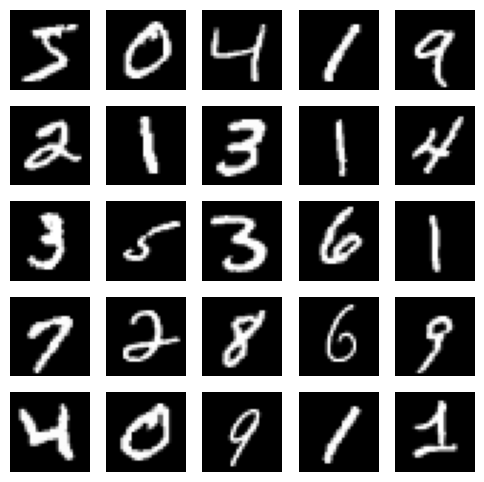

In [13]:
import matplotlib.pyplot as plt

# 25 image print
plt.figure(figsize=(6,6))

for idx in range(25):
  plt.subplot(5,5,idx +1) # 5row,5col
  plt.imshow(Q_train[idx],cmap='gray')
  plt.axis('off')
plt.show()

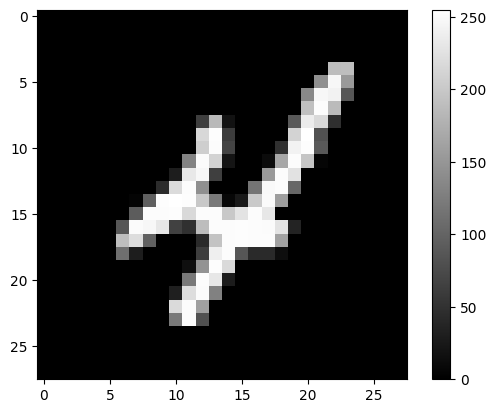

In [14]:
plt.imshow(Q_train[9],cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
plt.title('Label distribution(train)')
plt.grid()
plt.xlabel('Label')

plt.hist(A_train, bins =10, rwidth=0.8)
plt.show()

라벨 데이터(타겟 데이터) 별 빈도수를
히스토그램으로 시각화 출력한다
MNIST는 완벽한 균등 분포가 아닌,
각 숫자별로 비슷한 수준의 표본 수를 가진
비균등한 분포
모델이 자주 등장하는 숫자에 편향됨
즉, “자주 나오는 클래스=중요한 클래스”라고 잘못 배울 위험
>> 샘플링 조정, 가중치 조정, 데이터 증강 등으로 해결 시도.

In [15]:
answer_distribution = np.zeros(10)

for i in range(len(A_train)):
  answer = int(A_train[i])
  answer_distribution[answer] = answer_distribution[answer] +1
print(answer_distribution)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


answer_distribution = np.zeros(10)크기가 10인 0으로 초기화된 배열 생성.
for i in range(len(A_train)):A_train의 길이만큼 반복
 훈련 데이터의 레이블을 하나씩 확인하기 위한 반복문.
answer = int(A_train[i]): A_train의 idx번째 요소를 정수로 변환하여 answer 변수에 저장.
이는 현재 순회 중인 훈련 데이터의 레이블을 나타낸다.
answer_distribution[answer] = answer_distribution[answer] +1: answer 변수에 해당하는
인덱스 위치의 answer_distribution 값을 1 증가. 현재 레이블의 개수를 1 증가.

In [16]:
Q_train = (Q_train - 0.0)/(255.0-0.0)#Min_Max
Q_test = (Q_test - 0.0)/(255.0-0.0)#Min_Max

A_train = tf.keras.utils.to_categorical(A_train,num_classes=10) # 원핫인코딩 처리
A_test = tf.keras.utils.to_categorical(A_test,num_classes=10) # 원핫인코딩 처리

입력 데이트 민맥스 처리
라벨데이터 원핫인코딩

Q_train = (Q_train - 0.0)/(255.0-0.0)
훈련 데이터인 x_train의 값을 0에서 255 사이로 정규화(normalization).
이를 위해 모든 값을 0(min value)으로 빼고, 255로 나누어서 각 값이 0과 1 사이의 범위로 맞춘다.
Q_test = (Q_test - 0.0)/(255.0-0.0)#Min_Max
테스트 데이터인 x_test에도 동일한 정규화 과정을 적용.
A_train = tf.keras.utils.to_categorical(A_train,num_classes=10)
훈련 데이터의 레이블인 t_train을 원-핫 인코딩(one-hot encoding) 형식으로 변환.
이를 위해 to_categorical 함수를 사용하고, 레이블의 클래스 개수인 num_classes를 10으로 지정.
이 과정을 통해 각 레이블은 10차원의 벡터로 변환되며,
해당하는 인덱스만 1이고 나머지는 0인 형태로 표현.
A_test = tf.keras.utils.to_categorical(A_test,num_classes=10)
테스트 데이터의 레이블에도 동일한 원-핫 인코딩 과정을 적용.
* 오류 주의 : 오타등으로 재실행시 원핫 인코딩이 두번 실행될 수 있다.
처음: 정수 레이블 (예: 3) → [0,0,0,1,0,0,0,0,0,0] (shape: (batch_size, 10))
다시 한 번 적용하면 → one-hot 인코딩된 것을 또 인코딩 → (batch_size, 10, 10)

훈련 데이터의 레이블인 t_train을 원-핫 인코딩(one-hot encoding) 형식으로 변환.
이를 위해 to_categorical 함수를 사용하고, 레이블의 클래스 개수인 num_classes를 10으로 지정.
이 과정을 통해 각 레이블은 10차원의 벡터로 변환되며,
해당하는 인덱스만 1이고 나머지는 0인 형태로 표

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

력(28*28=784) : 2차원의 이미지 데이터를 1차원으로 평탄화.
 입력 이미지의 크기가 (28, 28)이므로 input_shape를 (28, 28)로 지정
입력 1개당 100개의 노드와 bias 100개가 임의의 초기값으로 추가
 (fully connected,파라미터 78,500 = 784(input)*100(node) + 100(bias) )
입력 100에서 출력 10개와 bias 10개 추가 노드(1010 = 100(input) * 10(node) + 10(bias))

model = tf.keras.Sequential()
Sequential 모델은 레이어를 선형으로 쌓아 구성하는 가장 간단한 형태의 모델.
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
Flatten 레이어 2차원의 이미지 데이터를 1차원으로 평탄화.
 입력 이미지의 크기가 (28, 28)이므로 input_shape를 (28, 28)로 지정.
 model.add(tf.keras.layers.Dense(100,activation='relu'))
Dense 레이어를 추가. 이 레이어는 100개의 뉴런을 가지며, 활성화 함수로 ReLU를 사용.
이 레이어는 입력과 모든 뉴런 사이에 연결이 존재하는 완전 연결층(Fully Connected Layer)
model.add(tf.keras.layers.Dense(10,activation='softmax')).
마지막으로 Dense 레이어를 추가. 이 레이어는 10개의 뉴런을 가지며, 활성화 함수로 softmax를 사용.
이 레이어는 최종 출력을 각 클래스(0부터 9까지의 숫자)에 대한 확률로 변환하는 역할.

완전 연결층
인공 신경망에서 가장 기본적인 층, 모든 입력 뉴런과 출력 뉴런이 서로 연결되어 있는 층.
각 입력 뉴런은 출력 뉴런과 가중치로 연결되어 있으며, 이 가중치는 학습 과정에서 조정.

In [18]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
loss='categorical_crossentropy',
metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
loss='categorical_crossent ropy',
metrics=['accuracу'])모델을 컴파일. 이때 옵티마이저로는 Adam을 사용하며, 학습률은 1e-3(0.001)로 설정.
손실 함수로는 categorical_crossentropy를 사용하며,
평가 지표로는 정확도(accuracy)를 사용.
model.summary()모델의 구조를 요약하여 출력.
각 레이어의 이름, 출력 크기, 파라미터 개수 등의 정보를 확인.
이를 통해 모델의 구조와 파라미터 개수를 쉽게 파악할 수 있다.

In [19]:
ModelFit = model.fit(Q_train, A_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8542 - loss: 0.5223 - val_accuracy: 0.9463 - val_loss: 0.1903
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9557 - loss: 0.1513 - val_accuracy: 0.9540 - val_loss: 0.1537
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9699 - loss: 0.1048 - val_accuracy: 0.9657 - val_loss: 0.1171
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9785 - loss: 0.0758 - val_accuracy: 0.9659 - val_loss: 0.1170
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9826 - loss: 0.0588 - val_accuracy: 0.9684 - val_loss: 0.1113
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9859 - loss: 0.0468 - val_accuracy: 0.9689 - val_loss: 0.1063
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9899 - loss: 0.0361 - val_accuracy: 0.9698 - val_loss: 0.1081
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9912 - loss: 0.0294 - 

ModelFit = model.fit(Q_train, A_train, epochs=30, validation_split=0.3)
주어진 학습 데이터 x_train과 정답 데이터 t_train을 사용하여 모델을 학습.
epochs=30은 전체 데이터셋을 30번 반복하여 학습한다.
validation_split=0.3은 학습 중에 30%의 데이터를 검증(validation) 데이터로 사용한다는 의미.
학습 결과는 저장.
주어진 데이터를 사용하여 모델을 학습하고,
각 에폭(epoch)마다 학습 손실(loss)과 정확도(accuracy),
검증 손실(validation loss)과 검증 정확도(validation accuracy) 출력.
학습 완료 후 객체에는 학습 이력(history) 정보가 저장되어 있어서
학습 과정을 시각화하거나 평가 등에 활용할 수 있다.

In [20]:
test_loss,test_accuracy = model.evaluate(Q_test,A_test)

print('test loss :',test_loss)
print('test accuracy : ',test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9735 - loss: 0.1469
test loss : 0.12563982605934143
test accuracy :  0.9772999882698059


odel.evaluate(Q_test,A_test)
주어진 테스트 데이터와 정답 데이터를 사용하여 모델 평가
결과 accuracy: 0.9717 - loss: 0.1537
실행 결과로는 평가 지표들이 출력.
는 정확도를 나타내며, 모델이 입력 데이터를 얼마나 정확하게 예측하는지를 나타낸다.
정확도는 예측 결과가 정답과 일치하는 샘플의 비율로 계산.
손실 값으로, 모델이 주어진 입력 데이터에 대해 얼마나 잘 예측하는지를 나타낸다.
주로 오차 함수(손실 함수)에 의해 계산

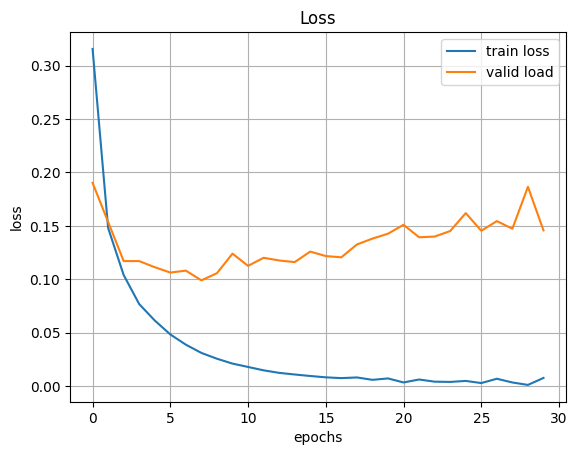

In [21]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(ModelFit.history['loss'],label='train loss')
plt.plot(ModelFit.history['val_loss'],label='valid load')

plt.legend(loc='best')
plt.show()

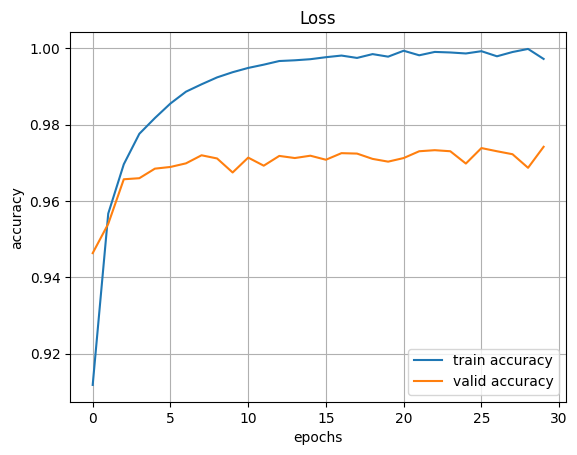

In [22]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(ModelFit.history['accuracy'],label='train accuracy')
plt.plot(ModelFit.history['val_accuracy'],label='valid accuracy')

plt.legend(loc='best')
plt.show()

상황 대응 방법
과적합이 시작됨 early stopping, dropout,
학습 횟수 줄이기
데이터 부족
regularization 사용 고려
현재로선 6~7 epoch 정도에서 early stop 하는 것이 좋을 수 있음
data augmentation 또는 학습 데이터 확장 고려

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step


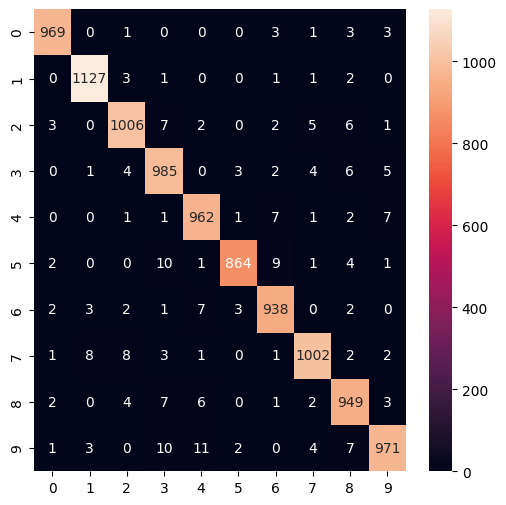

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(Q_test) # 784개의 입력 x_test가 10개의 출력값으로 나온다

Cmatrix = confusion_matrix(np.argmax(A_test, axis=-1), #원핫인코딩 처리된 L_test에서 제일 큰값을 갖는
np.argmax (predicted_value, axis=-1)) # 원핫인코딩 처리된 값 중 제일 큰값을 갖는 인

sns.heatmap (Cmatrix, annot=True, fmt='d')
plt.show()

Cmatrix = confusion_matrix(np.argmax(t_test, axis=-1),  
                           np.argmax(predicted_value, axis=-1))

실제 레이블(t_test)과 예측된 값(predicted_value)을 사용하여 혼동 행렬(confusion matrix)을 생성  
※ np.argmax(t_test, axis=-1): 실제 레이블(t_test) 원-핫 인코딩된 형태에서 가장 값을 갖는 인덱스를 추출. 실제 클래스를 나타내는 정수값으로 변환하는 과정.  
※ np.argmax(predicted_value, axis=-1): 예측된 값(predicted_value) 원-핫 인코딩 형태에서 가장 큰 값을 갖는 인덱스를 추출. 예측 클래스를 나타내는 정수값으로 변환하는 과정.

- 혼동 행렬은 클래스 별로 실제 클래스와 예측 클래스의 조합에 따라 카운트된 값으로 구성.  
  예를 들어, cm[i][j]는 실제로는 클래스 i에 속하지만 모델이 클래스 j로 예측한 데이터 포인트의 개수를 나타낸다.

sns.heatmap(cm, annot=True, fmt='d')

cm을 히트맵으로 표시.  
- annot=True: 각 셀에 숫자 값을 표시하도록 지정,  
- fmt=‘d’: 숫자 형식을 정수로 지정.  
- 히트맵은 셀의 색상을 사용하여 데이터의 상대적인 값을 시각화하는 데 사용.
II. Deep Learning

axis=-1은 NumPy 배열에서 마지막 축(axis)을 나타낸다.

NumPy의 다차원 배열은 여러 개의 축을 가질 수 있으며, 각 축은 해당 축을 따라 배열의 차원이 결정.  
예를 들어, 3차원 배열은 열, 행, 깊이의 3개의 축을 가지며,  
이는 배열의 차원에 의존하며 항상 마지막 축을 선택한다는 것을 의미.

예를 들어 (3, 4, 5) 모양의 3차원 배열에서 axis=-1은 마지막 축인 크기 5의 축을 선택.

※ Softmax, argmax와 같은 함수는 마지막 축을 기준으로 연산을 수행하는 경우가 많다.  
특히, 신경망의 출력 벡터는 마지막 축을 클래스 레이블이 있는 축으로 간주하고 있기 때문에,  
axis=-1을 사용하여 손쉽게 클래스에 대한 연산을 수행할 수 있다.



In [24]:
predicted_value =np.round(predicted_value)
predicted_value = predicted_value.astype(int)
print(predicted_value)

[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(Cmatrix)
print()

for i in range(10):
  print(('label = %d\t)%d/%d)#taccuracy = %.3f') %
        (i, np.max(Cmatrix[i]), np.sum(Cmatrix[i]),
        np.max(Cmatrix[i])/np.sum(Cmatrix[i])))

[[ 969    0    1    0    0    0    3    1    3    3]
 [   0 1127    3    1    0    0    1    1    2    0]
 [   3    0 1006    7    2    0    2    5    6    1]
 [   0    1    4  985    0    3    2    4    6    5]
 [   0    0    1    1  962    1    7    1    2    7]
 [   2    0    0   10    1  864    9    1    4    1]
 [   2    3    2    1    7    3  938    0    2    0]
 [   1    8    8    3    1    0    1 1002    2    2]
 [   2    0    4    7    6    0    1    2  949    3]
 [   1    3    0   10   11    2    0    4    7  971]]

label = 0	)969/980)#taccuracy = 0.989
label = 1	)1127/1135)#taccuracy = 0.993
label = 2	)1006/1032)#taccuracy = 0.975
label = 3	)985/1010)#taccuracy = 0.975
label = 4	)962/982)#taccuracy = 0.980
label = 5	)864/892)#taccuracy = 0.969
label = 6	)938/958)#taccuracy = 0.979
label = 7	)1002/1028)#taccuracy = 0.975
label = 8	)949/974)#taccuracy = 0.974
label = 9	)971/1009)#taccuracy = 0.962


In [33]:
model.save('my_model.keras', include_optimizer=False)

In [34]:
from PIL import Image
import numpy as n
model=tf.keras.models. load_model('/content/my_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [35]:
# 실제 이미지 파일 불러오기
img = Image.open('/content/SAM.png').convert('L') # image.png는 실제이미지 경로
img = Image.open('/content/four.png').convert('L') # image.png는 실제이미지 경로
img = img.resize((28,28)) # mnist 데이터와 동일한 크기인 28x28로 이미지 크기 조정
# 이미지 데이터를 넘파이 배열로 변환
input_data = np.array(img)
# 데이터 전처리 (색상 반전 및 정규화)
input_data = (255 - input_data)/ 255.0

# 배치 차원 추가
input_data = np.expand_dims(input_data, axis=0)

PIL(Python Imaging Library)에서 이미지를 처리할 때 'L'은 "luminance"(휘도), 이미지를 흑백(그레이스케일)으로 변환
input_data = (255 - input_data)/255.0
비주얼 표현 변경: 원래의 흑백 이미지에서, 흰색은 높은 픽셀 값(255에 가까움)을 가지며, 검은색은
낮은 픽셀 값(0에 가까움)을 갖는. (255 - input_data) 연산을 사용하면 순서가 뒤바뀌어, 흰색이 낮은
값(0에 가까움)을, 검은색이 높은 값(255에 가까움)을 가지게 됨.
input_data = np.expand_dims(input_data, axis=0):
배열에 추가적인 차원을 추가
원본 input_data 배열의 shape이 (28, 28)이었다면, 이 코드를 실행한 후에는 shape이 (1, 28, 28)로 변환
대부분의 딥 러닝 모델이 여러 이미지를 한 번에 처리하도록 설계되어 있어서, 단일 이미지를
입력하더라도 그 이미지가 3차원 배열로 제공되어야 한다. 이 경우 첫 번째 차원은 '배치' 차원으로,
처리할 이미지의 수를 나타냄.

In [36]:
prediction = model.predict(input_data)
print('Predicted digit:',np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted digit: 8


In [32]:
Q_train = Q_train /255.0
Q_test=Q_test/255.0

# cnn 입력용 reshape
Q_train = Q_train.reshape(-1,28,28,1) # cnn으로 변경
Q_test= Q_test.reshape(-1,28,28,1) # cnn으로 변경

# 원-핫 인코딩
A_train = tf.keras.utils.to_categorical(A_train,num_classes = 10)
A_test = tf.keras.utils.to_categorical(A_test,num_classes=10)

# model config
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) # CNN으로변경
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='relu'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


배치 노멀라이재이션 추가:각 층 사이에 배치 정규화를 추가하여 학습 안정성을 높이고, 더
깊은 네트워크 구조가 가능하도록 합니다.
드랍아웃 추가: 과대적합을 방지하기 위해 드롭아웃을 추가합니다.
덴스 레이어 개수 및 노드 수 조정: Dense 층의 개수 및 크기를 조정하여 모델의 복잡성을
줄이고, 더 적절한 피처 표현을 학습하도록 합니다.
데이터 증강:이미지를 회전, 이동, 확대 등의 방식으로 데이터셋을
증강하여 모델이 다양한 패턴을 학습하도록 유도합니다.
얼리 스탑핑:과대적합을 방지하기 위해 early stopping을 사용하여 더 이상 성능이 개선되지
않으면 학습을 중단하도록 합니다

아키텍처 조정:다양한 모델 구조 실험: VGG, ResNet과 같은 보다 깊은 네트워크 아키텍처를 사용해 볼 수
있습니다.
전이 학습:사전 훈련된 모델을 사용하고, 마지막 레이어만 조정하는 방법을
고려할 수 있습니다.
하이퍼 파라미터 튜팅학습률 스케줄링: 학습 중에 학습률을 조정하여 더 나은 수렴을 유도할 수 있습니다.
다양한 손실 함수 시도MNIST는 분류 문제이므로, 다른 손실 함수(예: Focal Loss)를 시도해보는 것도 좋은
방법입니다. 이는 클래스 불균형 문제를 완화하는 데 도움이 될 수 있습니다.
정규화 기법:L2 정규화와 같은 정규화 기법을 도입하여 모델의 일반화 능력을 향상시킬 수 있습니다.
앙상블 방법:여러 모델을 훈련시켜 이들의 예측을 결합하여 최종 예측을 개선할 수 있습니다.

In [1]:
# GPU 사용 여부 확인
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'using device : {device}')

using device : cuda


In [2]:
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [3]:
# 데이터 전처리
transfrom = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True,download=True,transform=transfrom)
test_dataset = datasets.MNIST(root='./data',train=False,download=True,transform=transfrom)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=64,shuffle=False)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.59MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.12MB/s]


In [26]:
# CNN 모델 정의
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(1,32,kernel_size = 3)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(64*5*5,128)
    self.fc2 = nn.Linear(128,10)
  def forward(self,x):
    x = self.pool(torch.relu(self.conv1(x)))
    x = self.pool(torch.relu(self.conv2(x)))
    x = x.view(x.size(0),-1)
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [27]:
# model 손실 함수 및 옵티마이저 정의
model = CNN().to(device) # 모델을 디바이스 정의에 맞게 실행
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # lr=1-e3

In [28]:
# 학습 함수
def train(model, train_loader, optimizerm, loss_fn, device):
  model.train()
  running_loss = 0.0
  correct = 0
  total = 0
  for images, labels in train_loader:
    images, labels = images.to(device),labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = loss_fn(outputs, labels)
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Loss 및 Accuracy 계산
    running_loss  += loss.item()
    _,predicted = torch.max(outputs,1)
    correct += (predicted == labels).sum().item()
    total += labels.size(0)
  avg_loss = running_loss / len(train_loader)
  accuracy = correct/ total * 100
  return avg_loss,accuracy

In [31]:
# 5. 평가 함수
def evaluate(model, test_loader, loss_fn, device):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = loss_fn(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_loss = test_loss / len(test_loader)
    accuracy = correct / total * 100

    return avg_loss, accuracy

In [32]:
# 학습 및 평가
num_epochs = 30
train_losses, train_accuracies = [],[]
test_losses, test_accuracies = [], []

best_test_acc = 0.0 # 가장 좋은 테스트 정확도를 기록하기 위한 변수(이 부분을 학습 루프 외부에 정의)

for epoch in range(num_epochs):
    train_loss, train_acc = train(model,train_loader, optimizer, loss_fn,device)
    test_loss, test_acc = evaluate(model,test_loader,loss_fn,device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%,'
          f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

    if test_acc > best_test_acc:
      best_test_acc = test_acc
      torch.save(model.state_dict(), f'best_model_epoch_{epoch+1}.pth') # 모델 저장
      print(f'Best model saved with Test Accuracy: {test_acc:.2f}% at Epoch {epoch+1}')

Epoch [1/30], Train Loss: 0.0104, Train Acc: 99.66%,Test Loss: 0.0339, Test Acc: 99.05%
Best model saved with Test Accuracy: 99.05% at Epoch 1
Epoch [2/30], Train Loss: 0.0089, Train Acc: 99.72%,Test Loss: 0.0397, Test Acc: 98.82%
Epoch [3/30], Train Loss: 0.0084, Train Acc: 99.74%,Test Loss: 0.0407, Test Acc: 98.79%
Epoch [4/30], Train Loss: 0.0068, Train Acc: 99.78%,Test Loss: 0.0424, Test Acc: 98.96%
Epoch [5/30], Train Loss: 0.0071, Train Acc: 99.76%,Test Loss: 0.0330, Test Acc: 99.12%
Best model saved with Test Accuracy: 99.12% at Epoch 5
Epoch [6/30], Train Loss: 0.0051, Train Acc: 99.83%,Test Loss: 0.0300, Test Acc: 99.26%
Best model saved with Test Accuracy: 99.26% at Epoch 6
Epoch [7/30], Train Loss: 0.0047, Train Acc: 99.86%,Test Loss: 0.0337, Test Acc: 99.16%
Epoch [8/30], Train Loss: 0.0044, Train Acc: 99.83%,Test Loss: 0.0409, Test Acc: 99.11%
Epoch [9/30], Train Loss: 0.0050, Train Acc: 99.82%,Test Loss: 0.0453, Test Acc: 99.18%
Epoch [10/30], Train Loss: 0.0042, Train Ac

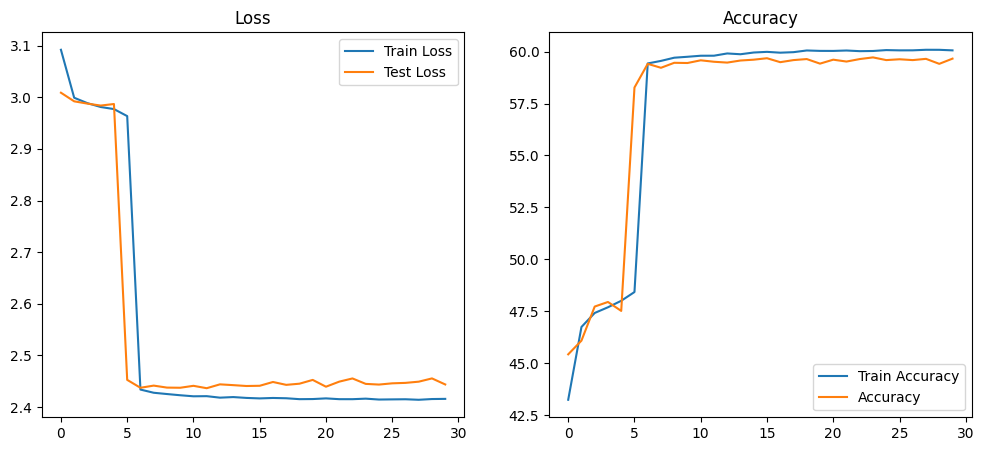

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses,label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_accuracies,label='Train Accuracy')
plt.plot(test_accuracies,label='Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [44]:
import torch
from torchvision import transforms
from PIL import Image
import numpy as np

# 새로운 모델 인스턴스 생성
model = CNN()

# 저장된 모델 가중치만 로딩
# 저장된 모델 파일 경로 적절히 수정
model.load_state_dict(torch.load('best_model_epoch_30.pth'))  # weights_only 제거
model.eval()

# 이미지 전처리 함수(배경이 흰색이면 반전 필요)
def preprocess_image(image_path):
  # 이미지 로드 및 흑백으로 변환
    image = Image.open(image_path).convert('L')  # 흑백으로 변환 L은 그레이 스케일 모드

    # 색상 반전 (흰 배경 → 검정 배경)
    image = np.array(image)
    image = Image.fromarray(255 - image)

    # 전처리: 리사이즈, 텐서 변환, 정규화 (28x28)
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)) # MNIST와 비슷하게 정규화
    ])

    # 이미지 텐서 변환 후 배치 차원 추가(1,28,28)
    image = transform(image).unsqueeze(0)  # 오타 수정: unsqieeze → unsqueeze
    return image


모델이 예측한 숫자: 3


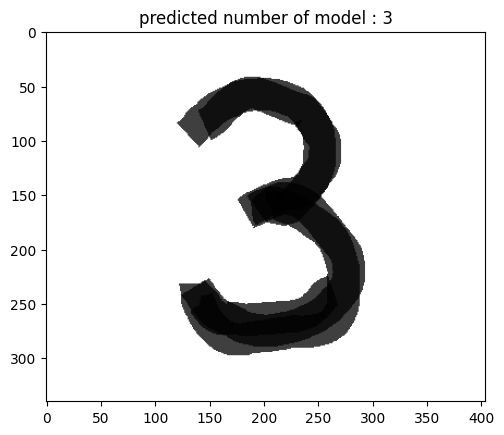

In [46]:
image_path = '/content/SAM.png'
# image_path = '/content/four.png'

image = preprocess_image(image_path)
with torch.no_grad():
  output = model(image)
  _,predicted = torch.max(output,1)
  print(f'모델이 예측한 숫자: {predicted.item()}')

plt.imshow(Image.open(image_path).convert('L'), cmap='gray')
plt.title(f'predicted number of model : {predicted.item()}')
plt.show()